<a href="https://colab.research.google.com/github/ClarisseAlvarenga/codenation_aceleradev_ds/blob/master/Desafio_semana_5_Codenation_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [136]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [137]:
athletes = pd.read_csv("athletes.csv")

In [138]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [139]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [140]:
athletes.shape

(11538, 11)

In [141]:
athletes.describe()[['height', 'weight', 'gold', 'silver', 'bronze']]

,height,weight,gold,silver,bronze
count,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,1.766282,72.068205,0.057722,0.056769,0.061016
std,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.210000,31.000000,0.000000,0.000000,0.000000
25%,1.690000,60.000000,0.000000,0.000000,0.000000
50%,1.760000,70.000000,0.000000,0.000000,0.000000
75%,1.840000,81.000000,0.000000,0.000000,0.000000
max,2.210000,170.000000,5.000000,2.000000,2.000000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [142]:
amostra_altura = get_sample(athletes, 'height', n=3000, seed=42)

In [143]:
amostra_altura.head()

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
Name: height, dtype: float64

In [144]:
#aplicando o teste Shapiro na amostra 
estatistica, p_valor = sct.shapiro(amostra_altura)
print(estatistica)
print(p_valor)

0.9961519837379456
5.681722541339695e-07


In [145]:
#criando a significância
significancia = 0.05

In [146]:
#O teste retorna a hipótese nula de que os dados derivam de uma distribuição normal. Caso o p_valor seja menor que a significância, devemos rejeitar a hipótese nula

p_valor <= significancia

True

In [198]:
#aqui usamos a fórmula para aceitar a hipótese nula, portanto usamos o contrário da fórmula de rejeição.
def q1():
  return bool(p_valor > significancia)

In [199]:
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

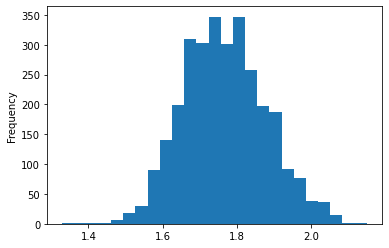

In [148]:
#vendo o histograma, apesar há uma diferença entre as caudas, e não há uma média clara.
amostra_altura.plot(kind='hist', bins=25)

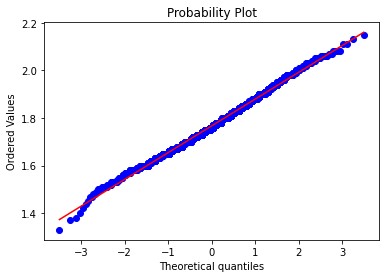

In [149]:
#Visualizando o QQPlot percebemos que apesar de se assemelhar a uma normal, ele não segue a linha da distribuição
sct.probplot(amostra_altura,plot=plt)
plt.show()

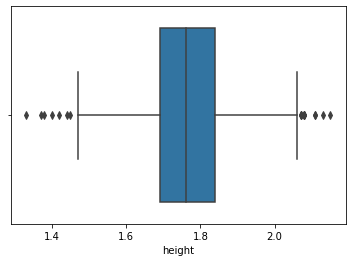

In [150]:
#visualizando o BoxPlot
sns.boxplot(amostra_altura)

In [151]:
#verificando Média, Mediana e Moda para confirmar para que lado pende a curva, que graficamente mostra uma leve assimetria à esquerda
amostra_altura.mean()

1.766779999999997

In [152]:
amostra_altura.median()

1.76

In [153]:
amostra_altura.mode()

0    1.8
dtype: float64

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [154]:
estatistica_JB, p_valor_JB = sct.jarque_bera(amostra_altura)
print(estatistica_JB)
print(p_valor_JB)

13.03363513594265
0.001478366424594868


In [155]:
#verificando a hipótese nula - The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
#faz o teste considerando o Skew e a Kurtose (o terceiro e o quarto momentos), com o de uma distribuição normal
#aqui usamos a fórmula para rejeitar a hipótese nula, portanto na questão vamos colocar o valor contrário
p_valor_JB <= significancia

True

In [200]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return bool(p_valor_JB > significancia)

In [201]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [157]:
#criando a amostra de peso
amostra_peso = get_sample(athletes, 'weight', n=3000, seed=42)

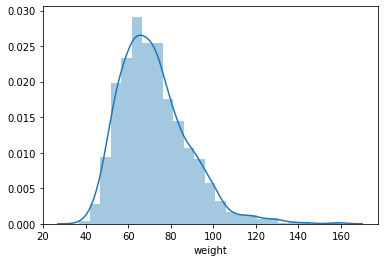

In [158]:
#visualizando graficamente
sns.distplot(amostra_peso, bins=25)

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([ 37.,  39.,  39., ..., 159., 160., 160.])),
 (15.945260855959946, 72.12266666666666, 0.9733842945053901))

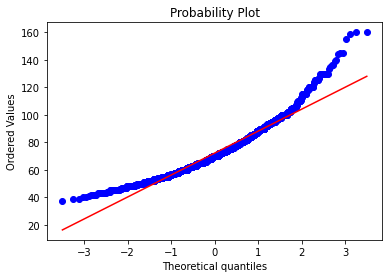

In [159]:
sct.probplot(amostra_peso, plot=plt)

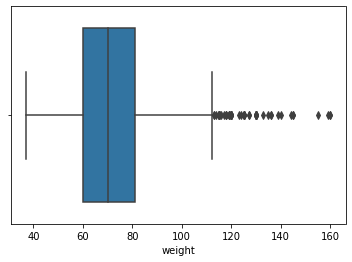

In [160]:
sns.boxplot(amostra_peso)

In [161]:
#fazendo o teste de normalidade
estatistica_pearson, p_valor_pearson = sct.normaltest(amostra_peso)
print(estatistica_pearson)
print(p_valor_pearson)

510.24655809881176
1.5898922918029537e-111


In [162]:
#chamando a significancia
significancia

0.05

In [163]:
#fazendo o teste da hipótese nula - This function tests the null hypothesis that a sample comes from a normal distribution
#aqui usamos a fórmula para rejeitar a hipótese nula, portanto na questão vamos colocar o valor contrário
p_valor_pearson <= significancia

True

In [202]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return bool(p_valor_pearson > significancia)

In [203]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [165]:
#transformando o array usando o numpy
amostra_peso_log = np.log(amostra_peso)
print(amostra_peso.head())
print(amostra_peso_log.head())

2162    80.0
3450    70.0
6886    69.0
3871    66.0
6383    82.0
Name: weight, dtype: float64
2162    4.382027
3450    4.248495
6886    4.234107
3871    4.189655
6383    4.406719
Name: weight, dtype: float64


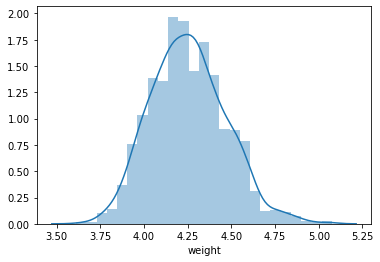

In [166]:
#visualizando graficamente
sns.distplot(amostra_peso_log, bins=25)

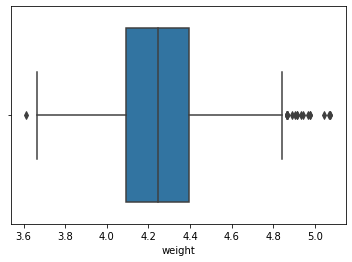

In [167]:
sns.boxplot(amostra_peso_log)

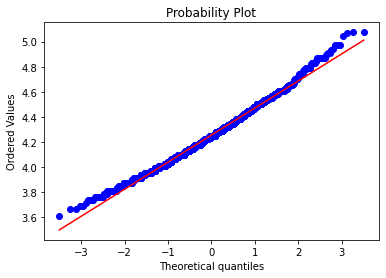

In [168]:
sct.probplot(amostra_peso_log, plot=plt)
plt.show()

In [169]:
#aplicando o teste de normalidade
stats_pearson_log, p_valor_pearson_log = sct.normaltest(amostra_peso_log)
print(stats_pearson_log)
print(p_valor_pearson_log)

45.91534331977353
1.0705572101256944e-10


In [170]:
#fazendo o teste da hipótese nula - This function tests the null hypothesis that a sample comes from a normal distribution
#aqui usamos a fórmula para rejeitar a hipótese nula, portanto na questão vamos colocar o valor contrário
p_valor_pearson_log <= significancia

True

In [204]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return bool(p_valor_pearson_log > significancia)

In [205]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [172]:
#criando os DFs
bra, usa, can = athletes.query('nationality =="BRA"'), athletes.query('nationality =="USA"'), athletes.query('nationality =="CAN"')
bra.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
79,236523132,Adam Imer,BRA,male,8/18/89,1.82,88.0,hockey,0,0,0
106,993710181,Adenizia da Silva,BRA,female,12/18/86,1.87,65.0,volleyball,0,0,0
109,930618704,Adilson da Silva,BRA,male,1/24/72,1.70,79.0,golf,0,0,0
114,787208883,Adrian Baches,BRA,male,4/7/90,1.84,83.0,aquatics,0,0,0
128,80367651,Adriana Aparecida da Silva,BRA,female,7/22/81,1.66,52.0,athletics,0,0,0


In [173]:
#visualizando usa
usa.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0
64,884912136,Abigail Johnston,USA,female,11/16/89,1.66,61.0,aquatics,0,0,0
104,259002430,Adeline Maria Gray,USA,female,1/15/91,1.73,77.0,wrestling,0,0,0


In [174]:
#visualizando Canadá
can.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
77,136977152,Adam Froese,CAN,male,8/13/91,1.82,81.0,hockey,0,0,0
92,983411298,Adam van Koeverden,CAN,male,1/29/82,1.82,85.0,canoe,0,0,0
238,769580282,Akeem Haynes,CAN,male,3/11/92,1.68,71.0,athletics,0,0,1
332,84230211,Alena Sharp,CAN,female,3/7/81,1.68,69.0,golf,0,0,0


In [175]:
#verificando o tamanho das amostras
print(f'A amostra de atletas brasileiros é: {bra.shape[0]}')
print(f'A amostra de atletas estadunidenses é: {usa.shape[0]}')
print(f'A amostra de atletas canadenses é: {can.shape[0]}')

A amostra de atletas brasileiros é: 485
A amostra de atletas estadunidenses é: 567
A amostra de atletas canadenses é: 321


In [176]:
bra.height.mean()

1.764033613445379

In [177]:
usa.height.mean()

1.7877678571428557

In [178]:
amostra_bra = np.array(get_sample(bra, 'height'))
amostra_bra

array([1.86, 1.85, 1.83, 1.59, 1.88, 1.7 , 1.53, 1.7 , 1.67, 1.92, 1.8 ,
       1.58, 2.09, 1.76, 1.59, 1.96, 1.63, 1.63, 1.85, 1.94, 1.83, 1.65,
       1.8 , 1.56, 1.82, 1.67, 1.73, 1.91, 1.88, 1.83, 1.71, 1.76, 1.96,
       1.81, 1.73, 1.7 , 1.74, 1.8 , 1.33, 1.66, 1.68, 1.54, 1.67, 1.93,
       1.88, 1.75, 1.71, 2.08, 1.82, 1.77, 1.72, 1.93, 1.69, 1.94, 1.79,
       1.69, 1.72, 1.65, 1.6 , 1.9 , 1.85, 1.8 , 1.81, 1.75, 1.56, 1.73,
       1.82, 1.65, 1.73, 1.86, 1.63, 1.78, 1.85, 1.99, 1.61, 1.62, 1.62,
       1.76, 1.81, 1.76, 1.74, 1.88, 1.63, 1.64, 1.73, 1.75, 1.68, 1.61,
       1.58, 1.75, 1.85, 1.64, 1.83, 1.91, 1.68, 1.82, 1.7 , 1.58, 1.9 ,
       1.6 ])

In [179]:
#conferindo a média
amostra_bra.mean()

1.7519000000000002

In [180]:
#conferindo a variancia
amostra_bra.var()

0.01618339

In [181]:
amostra_usa = np.array(get_sample(usa, 'height'))
amostra_usa

array([1.8 , 1.68, 1.63, 1.91, 1.81, 1.73, 1.88, 1.83, 1.76, 1.75, 1.83,
       1.81, 1.73, 1.73, 1.7 , 1.86, 1.71, 1.82, 1.83, 1.83, 2.06, 1.96,
       1.76, 1.45, 1.73, 1.68, 1.73, 1.73, 1.89, 1.86, 1.86, 1.73, 1.83,
       1.73, 1.87, 2.01, 1.91, 1.73, 1.91, 1.76, 1.81, 1.88, 1.66, 1.73,
       1.78, 1.73, 1.83, 1.81, 1.99, 1.91, 1.83, 1.78, 1.61, 1.73, 1.68,
       1.78, 1.86, 1.71, 1.63, 1.96, 1.83, 1.73, 1.81, 1.93, 1.78, 1.73,
       1.65, 2.03, 1.75, 1.81, 1.78, 1.83, 1.71, 1.78, 1.66, 1.76, 1.63,
       1.68, 1.73, 1.91, 1.88, 1.81, 1.7 , 1.91, 1.55, 1.94, 1.88, 1.66,
       1.94, 1.76, 1.83, 1.73, 1.78, 1.88, 1.83, 1.71, 1.73, 1.76, 1.94,
       1.88])

In [182]:
#conferindo a média
amostra_usa.mean()

1.7913999999999999

In [183]:
#conferindo a variância
amostra_usa.var()

0.010694039999999998

In [184]:
#este teste testa a seguinte hipótese nula: This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
#This test assumes that the populations have identical variances by default. - Como ele presume que a variância é idêntica, vamos passar o equal_var False para mudar o tipo de teste
stats_bra_usa, p_valor_bra_usa = sct.ttest_ind(amostra_bra, amostra_usa, equal_var=False)
print(stats_bra_usa)
print(p_valor_bra_usa)

-2.397291376770201
0.01748528165217272


In [185]:
#conferindo o teste de rejeição da hipótese nula
#como a pergunta pede para confirmar a hipótese nula, vamos usar o contrário na resposta
p_valor_bra_usa <= significancia

True

In [206]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return bool(p_valor_bra_usa > significancia)

In [218]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [207]:
#vamos criar uma amostra para o Canadá. Para este teste vou aproveitar a amostra criada para o Brasil
amostra_can = np.array(get_sample(can, 'height'))
amostra_can


array([1.66, 1.75, 1.74, 2.05, 1.55, 1.76, 1.67, 1.58, 1.74, 1.8 , 1.72,
       1.96, 1.6 , 1.9 , 1.73, 1.71, 1.66, 1.6 , 1.8 , 1.8 , 1.7 , 1.85,
       1.57, 1.94, 1.65, 1.8 , 1.93, 1.8 , 1.75, 1.83, 1.63, 1.65, 1.69,
       1.72, 1.68, 1.65, 1.85, 1.96, 1.73, 1.72, 1.6 , 1.65, 1.71, 1.95,
       1.63, 1.68, 1.65, 1.78, 1.72, 1.79, 1.82, 1.7 , 1.87, 1.65, 1.75,
       1.55, 1.73, 1.88, 1.75, 1.78, 1.85, 1.9 , 2.03, 1.9 , 1.72, 1.95,
       1.7 , 1.72, 1.72, 1.83, 1.74, 1.7 , 1.68, 1.72, 1.8 , 2.  , 1.8 ,
       1.85, 1.65, 1.85, 1.75, 1.65, 1.62, 2.05, 1.69, 1.83, 1.6 , 1.9 ,
       1.95, 1.88, 1.62, 1.73, 1.74, 1.57, 1.64, 1.64, 1.78, 1.55, 2.01,
       1.67])

In [208]:
#conferindo a média
amostra_can.mean()

1.755

In [209]:
#conferindo a variância
amostra_can.var()

0.014406999999999996

In [210]:
#aplicando o teste
#este teste testa a seguinte hipótese nula: This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
#This test assumes that the populations have identical variances by default. - Como ele presume que a variância é idêntica, vamos passar o equal_var False para mudar o tipo de teste
stats_bra_can, p_valor_bra_can = sct.ttest_ind(amostra_bra, amostra_can, equal_var=False)
print(stats_bra_can)
print(p_valor_bra_can)

-0.1763545967450964
0.8601962262079699


In [211]:
#recuperando a significância:
significancia

0.05

In [212]:
#Como nas questões anteriores vamos colocar o teste de rejeição aqui e o teste contrário na resposta
p_valor_bra_can <= significancia

False

In [221]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return bool(p_valor_bra_can > significancia)


In [222]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [263]:
_, p_valor_usa_can = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit')


In [264]:
p_valor_usa_can.round(8)

0.00046601

In [266]:
def q7():
  # Retorne aqui o resultado da questão 7.
    return float(p_valor_usa_can.round(8))


In [267]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?